True

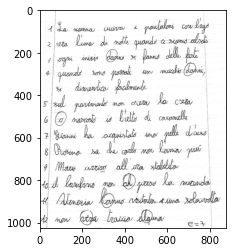

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("DatasetStellaMaris/Autore 44/1.jpg", 0)

if len(img.shape) != 2:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    gray = img

gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
cv2.THRESH_BINARY, 15, -2)

horizontal = np.copy(bw)

cols = horizontal.shape[1]
horizontal_size = cols // 30

horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))

horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

cv2.imwrite("horizontal_lines_extracted.png", horizontal)

horizontal_inv = cv2.bitwise_not(horizontal)
cv2.imwrite("inverse_extracted.png", horizontal_inv)

masked_img = cv2.bitwise_and(gray, gray, mask=horizontal_inv)
masked_img_inv = cv2.bitwise_not(masked_img)
plt.imshow(masked_img_inv, cmap='gray')
cv2.imwrite("masked_img.jpg", masked_img_inv)
